In [1]:
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout
from keras import optimizers, regularizers
from datetime import datetime
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from keras import optimizers

random_state = 6
np.random.seed(random_state)

Using TensorFlow backend.


### Define parameters

In [2]:
# filename = 'seismogram_data_cents_db.csv'
filename = 'seismogram_data_62_new.csv'
df = pd.read_csv(filename)
df.describe()

,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,...,centiroid,max_amplitude,mean_amplitude,moment,variation,skew,var,autocr,kurto,target
count,23496.000000,23496.000000,23496.000000,23496.000000,23496.000000,23496.000000,23496.000000,23496.000000,23496.000000,23496.000000,...,23496.000000,2.349600e+04,2.349600e+04,23496.0,23496.000000,23496.000000,2.349600e+04,2.349600e+04,23496.000000,23496.000000
mean,842.505003,73.359982,-0.894606,52.395407,2.601928,34.513327,7.728752,22.589093,12.131532,15.490778,...,959.045374,2.471252e+08,3.094769e+05,0.0,18.969707,-0.032753,5.274213e+11,1.096999e+17,7.173602,0.448332
std,189.732512,38.111069,38.966119,19.352436,24.226235,12.969548,15.588723,9.172668,10.312101,6.988078,...,1024.497248,1.740120e+09,4.249657e+06,0.0,3913.459504,1.590172,2.553565e+13,3.697947e+18,211.110656,0.497334
min,480.726115,-87.232311,-198.422667,-32.555981,-88.160009,-41.837174,-48.987699,-26.721758,-35.454891,-23.973469,...,3.588867,4.490561e+03,4.140245e+01,0.0,-427348.312500,-148.525772,0.000000e+00,1.098498e+06,-3.000000,0.000000
25%,701.650737,45.531983,-28.158299,39.503115,-15.940220,25.904370,-3.266232,16.958161,6.091282,11.349311,...,199.003485,5.968881e+05,1.863994e+03,0.0,-0.332406,-0.082917,3.750436e+04,1.124291e+10,-0.069240,0.000000
50%,825.624647,74.008466,2.385506,53.200929,3.833513,34.087116,9.972833,22.015254,14.141603,15.476138,...,546.485180,1.234899e+06,3.855819e+03,0.0,0.196938,-0.002934,1.565367e+05,4.730443e+10,0.186421,0.000000
75%,959.726289,99.577733,28.229987,65.021862,22.487635,42.324745,20.381357,27.575977,19.567520,19.274661,...,1442.009632,8.348212e+06,2.115913e+04,0.0,0.891293,0.063645,3.800722e+06,1.896499e+12,2.320519,1.000000
max,2065.265843,233.043814,112.815778,132.919902,64.457973,118.624193,58.102843,71.468831,53.939397,65.529958,...,6894.203309,7.142860e+10,5.437551e+08,0.0,287691.593750,67.194862,3.695033e+15,4.833089e+20,27424.243210,1.000000


In [3]:
Y = df['target']
X = df.drop(['target'], axis=1)

X, Y = shuffle(X, Y, random_state=random_state)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state)

Y_train = to_categorical(Y_train)

mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

input_dim = np.shape(X_train)[1]
output_dim = np.shape(Y_train)[1]

### Model setup

In [4]:
def create_baseline():
    model = Sequential()
    model.add(Dense(32, activation = 'relu', input_dim = input_dim, name='Input_layer'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu', name='layer_2'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation = 'relu', name='layer_3'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation = 'relu', name='layer_4'))
    model.add(Dense(output_dim, activation="softmax", name='Output_layer'))
    adam = optimizers.Adam(lr= 0.005)
    model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])
    return model

In [ ]:
model = create_baseline()
# class_weight = {0:1, 1:2}
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 2000, validation_split=0.25, verbose=1)

Train on 13216 samples, validate on 4406 samples
Epoch 1/2000
13216/13216 [==============================] - 8s - loss: 0.6519 - acc: 0.6103 - val_loss: 0.5776 - val_acc: 0.6745
Epoch 2/2000
13216/13216 [==============================] - 7s - loss: 0.5979 - acc: 0.6659 - val_loss: 0.5576 - val_acc: 0.7036
Epoch 3/2000
13216/13216 [==============================] - 7s - loss: 0.5774 - acc: 0.6803 - val_loss: 0.5458 - val_acc: 0.6884
Epoch 4/2000
 1990/13216 [===>..........................] - ETA: 6s - loss: 0.5663 - acc: 0.6864

In [24]:
pred = model.predict(X_test)
Y_pred = np.argmax(pred, axis = 1)

print('1. The accuracy of the model is {}\n'.format(accuracy_score(Y_test, Y_pred)))
print('2. Classification report \n {} \n'.format(classification_report(Y_test, Y_pred)))
print('3. Confusion matrix \n {} \n'.format(confusion_matrix(Y_pred, Y_test)))
print('4. Roc_Auc score \n {}'.format(roc_auc_score(Y_pred, Y_test)))

1. The accuracy of the model is 0.8980099502487562

2. Classification report 
              precision    recall  f1-score   support

        0.0       0.92      0.94      0.93       276
        1.0       0.86      0.81      0.83       126

avg / total       0.90      0.90      0.90       402
 

3. Confusion matrix 
 [[259  24]
 [ 17 102]] 

4. Roc_Auc score 
 0.8861686017163048


## Plot loss and accuracy 

In [17]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 16
    }

plt.rc('font', **font)
plt.rc('text', usetex=True)

color_map = 'inferno'

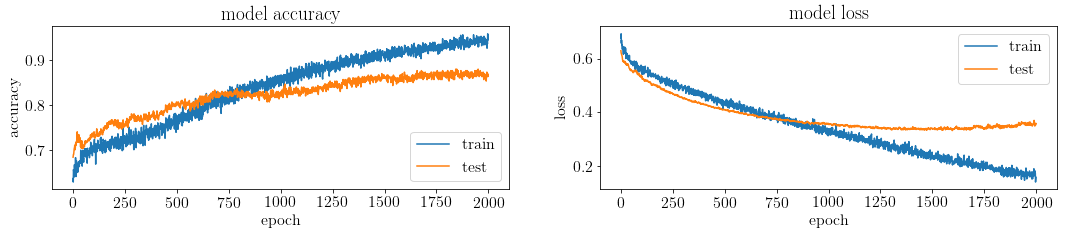

In [25]:
plt.figure(figsize=(18,3))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()